In [1]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

Dataset URL: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
License(s): CC0-1.0
 87% 14.0M/16.1M [00:02<00:00, 13.7MB/s]
100% 16.1M/16.1M [00:02<00:00, 7.42MB/s]


# Loading the dataset

In [2]:
!unzip real-or-fake-fake-jobposting-prediction.zip

Archive:  real-or-fake-fake-jobposting-prediction.zip
  inflating: fake_job_postings.csv   


In [3]:

# !pip install --upgrade pandas numpy matplotlib seaborn scikit-learn

# Import packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:


df = pd.read_csv("/content/fake_job_postings.csv")

In [6]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Data Preprocessing

In [7]:
df.shape

(17880, 18)

In [8]:





df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [9]:




df.drop(["job_id"],axis=1,inplace=True)

In [10]:


df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:

df.isnull().sum()

,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0
has_company_logo,0


In [12]:


df.isnull().mean()*100

,0
title,0.000000
location,1.935123
department,64.580537
salary_range,83.959732
company_profile,18.501119
description,0.005593
requirements,15.078300
benefits,40.335570
telecommuting,0.000000
has_company_logo,0.000000


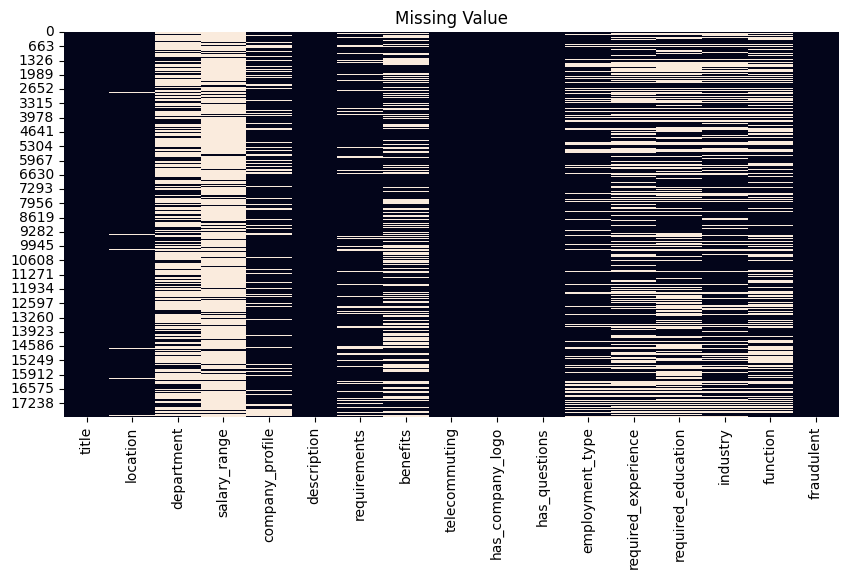

In [13]:
plt.figure(figsize=(10,5))
plt.title("Missing Value")
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [14]:
df.shape[0]/df.dropna().shape[0]

23.100775193798448

In [15]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [16]:
df.fillna(" " , inplace = True)

In [17]:
df.isnull().sum()

,0
title,0
location,0
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0
has_company_logo,0


In [18]:

df.duplicated().sum()

281

In [19]:

df[df.duplicated()]

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
146,Customer Service Associate,"US, TX, Dallas",,,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 6 months customer ser...,,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
402,Inside Sales Professional-Omaha,"US, NE, Omaha",,,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,,,Building Materials,Sales,0
495,Customer Service Associate - Part Time,"US, IL, Warrenville",,,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,,0,1,0,Full-time,Entry level,High School or equivalent,Insurance,Administrative,0
1019,Texas Captioning Assistant,"US, TX, Lubbock",CSD Relay,,"Why CSD?CSD is not only a great place to work,...",Captioning Assistants provide quick and accura...,A minimum of a High School Diploma or equivale...,CSD offers a competitive benefits package for ...,0,1,1,,Entry level,High School or equivalent,Telecommunications,Customer Service,0
1327,Recruiter/Recruiting Assistant,"US, CA, Inglewood",,,,“We believe our best investment is in our peop...,,,0,0,0,,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17591,Home Based Payroll Typist/Data Entry Clerks Po...,"US, MT, Absarokee",Clerical,,,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,0,0,,,,,,1
17612,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",,,,Urgent Jobs (Part Time Workers Needed)You can ...,No any experience required.,,0,0,0,Part-time,,,,,1
17620,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",,,,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,,,0,0,0,,,,,,1
17742,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",,,,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,,,0,0,0,,,,,,1


In [20]:
df.drop_duplicates(inplace=True)

In [21]:

df.duplicated().sum()

0

In [22]:
df.describe(include = "number")


,telecommuting,has_company_logo,has_questions,fraudulent
count,17599.000000,17599.000000,17599.000000,17599.000000
mean,0.042843,0.794136,0.492017,0.048639
std,0.202510,0.404343,0.499950,0.215119
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [23]:
df.describe(include = "object")

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17599,17599,17599,17599,17599,17599,17599,17599,17599,17599,17599,17599,17599
unique,11231,3106,1337,875,1710,14802,11968,6205,6,8,14,132,38
top,English Teacher Abroad,"GB, LND, London",,,,"Play with kids, get paid for it Love travel? J...",,,Full-time,,,,
freq,309,718,11334,14772,3282,376,2649,7108,11423,6962,8009,4837,6363


In [24]:

for i in df.describe(include = "object").columns:
  print(i)
  print(df[i].unique())
  print(df[i].nunique())
  print("-"*100)

title
['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX']
11231
----------------------------------------------------------------------------------------------------
location
['US, NY, New York' 'NZ, , Auckland' 'US, IA, Wever' ...
 'US, CA, los Angeles' 'CA, , Ottawa' 'GB, WSX, Chichester']
3106
----------------------------------------------------------------------------------------------------
department
['Marketing' 'Success' ' ' ... 'Admin - Clerical' 'Administrative Dept'
 'Hospitality']
1337
----------------------------------------------------------------------------------------------------
salary_range
[' ' '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80' '65000-70000' '75-115' '75000-110000' '17000-20000'
 '16000-28000' '95000-115000' '15000-18000' '500

# FEATURE ENGEENIRING
- IN feature engneering we can make a new feature by the name of `text` that will be the combination of all the categirical columns

In [25]:

df.head(1)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0


In [26]:

df["text"]= df['title'] + " "+ df['location'] + " "+ df['department'] + " "+ df['salary_range'] +  " " + df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits'] + " " + df['employment_type'] + " " + df['required_experience'] + " " + df['required_education'] + " " + df['industry'] + " " + df['function']



In [27]:
df.text[0]

"Marketing Intern US, NY, New York Marketing   We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food commu

CORRELATION

In [28]:
#df.corr()
df.select_dtypes(include="number").corr()["fraudulent"]*100

,fraudulent
telecommuting,3.564437
has_company_logo,-25.986769
has_questions,-9.096613
fraudulent,100.000000


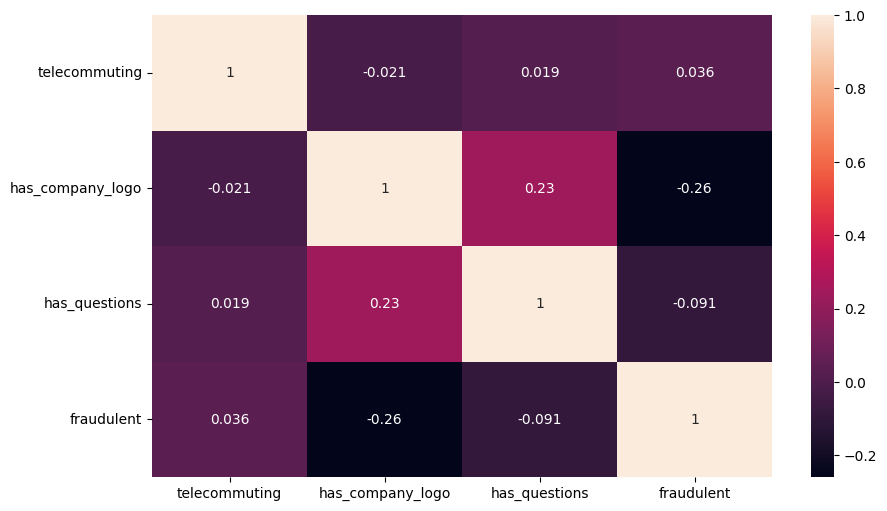

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)
plt.show()


# OBSERVATION
- Drop all the categorical columns except text column

In [30]:
df.drop(["title","location","department","salary_range","company_profile","description","requirements","benefits","employment_type","required_experience","required_education","industry","function"],axis=1,inplace=True)

In [31]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing ..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth Spo..."


# TEXT PREPROCESSING
- Convert into lower case
- Remove stalk words and punctuations
- Apply lemmitization or stemming
- Apply count vectorizer and r tfidf

In [32]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing ..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth Spo..."


In [35]:


# Define the text preprocessing function
def process_text(text):
    # Convert to lowercase
    text = text.lower()

    # # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # # Join the words back into a single string
    cleaned_text = ' '.join(lemmatized_words)

    return cleaned_text

In [36]:



# for i in nltk.word_tokenize("This is a car"):
  # if i not in  set(stopwords.words('english')):
#     print(i)
# lemmatizer = WordNetLemmatizer()
# lemmatizer.lemmatize("playing")
# ' '.join(['This',"is","a","car"])

# Testing the fun

In [37]:
print(process_text(df['text'][0]))

marketing intern u ny new york marketing food52 weve created groundbreaking awardwinning cooking site support connect celebrate home cook give everything need one placewe top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish wellknown professional like mario batali gwyneth paltrow danny meyer partnership whole food market random housefood52 named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today showwere located chelsea new york city food52 fastgrowing james beard awardwinning online food community crowdsourced curated recipe hub currently interviewing full parttime unpaid intern work small team editor executive developer new york city headquartersreproducing andor repackaging existing food52 content number partner site huffington post yahoo buzzfee

# Apply the fun

In [38]:
df['clean_text']=df['text'].apply(process_text)

In [39]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,clean_text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing ...",marketing intern u ny new york marketing food5...
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ...",customer service cloud video production nz auc...
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA...",commissioning machinery assistant cma u ia wev...
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",account executive washington dc u dc washingto...
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth Spo...",bill review manager u fl fort worth spotsource...


In [40]:
df2=df.copy()

In [41]:
df2.drop(["text"],axis=1,inplace=True)

In [42]:
df2.head()

,telecommuting,has_company_logo,has_questions,fraudulent,clean_text
0,0,1,0,0,marketing intern u ny new york marketing food5...
1,0,1,0,0,customer service cloud video production nz auc...
2,0,1,0,0,commissioning machinery assistant cma u ia wev...
3,0,1,0,0,account executive washington dc u dc washingto...
4,0,1,1,0,bill review manager u fl fort worth spotsource...


#EDA

In [43]:

df2["fraudulent"].value_counts()

,count
fraudulent,
0,16743
1,856


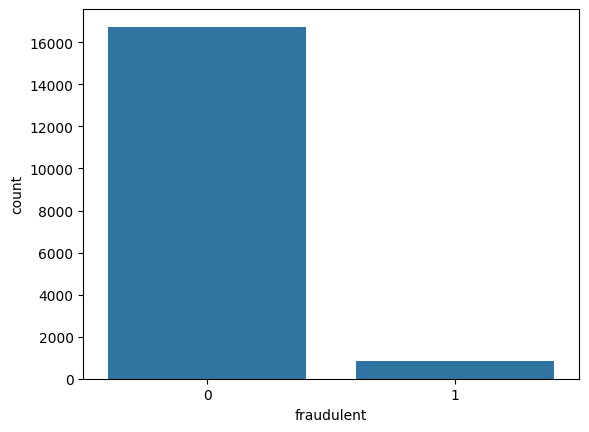

In [44]:
# prompt: generate a barplot

sns.countplot(x="fraudulent",data=df2)
plt.show()


# Make a word cloud of non_fraud andd fraud words

In [45]:
df2.head(2)

,telecommuting,has_company_logo,has_questions,fraudulent,clean_text
0,0,1,0,0,marketing intern u ny new york marketing food5...
1,0,1,0,0,customer service cloud video production nz auc...


In [46]:
non_fraud=df2[df2['fraudulent']==0]['clean_text'].tolist()

In [47]:
fraud=df2[df2['fraudulent']==1]['clean_text'].tolist()

In [48]:
!pip install wordcloud

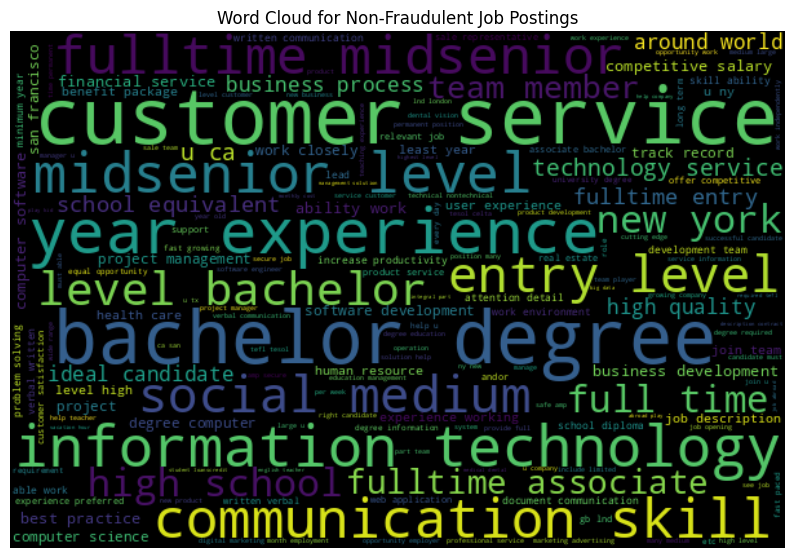

In [49]:
from wordcloud import WordCloud
# Non-fraudulent word cloud
non_fraud_wordcloud = WordCloud(width=600, height=400).generate(" ".join(non_fraud))
plt.figure(figsize=(10, 8))
plt.imshow(non_fraud_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Non-Fraudulent Job Postings")
plt.show()

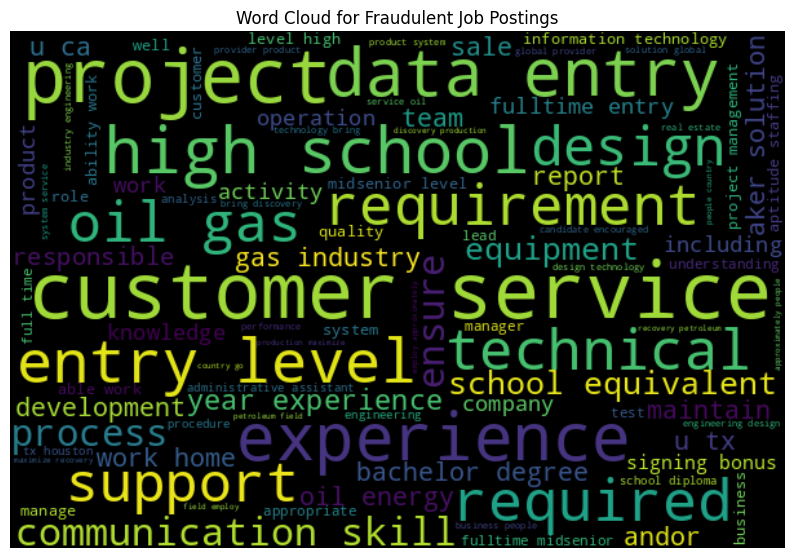

In [50]:
# Fraudulent word cloud
fraud_wordcloud = WordCloud(width=600, height=400).generate(" ".join(fraud))
plt.figure(figsize=(10, 8))
plt.imshow(fraud_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Fraudulent Job Postings")
plt.show()


# MODEL BUILDING

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [53]:
df2.head(1)

,telecommuting,has_company_logo,has_questions,fraudulent,clean_text
0,0,1,0,0,marketing intern u ny new york marketing food5...


In [78]:
# feature=df2.drop(columns=["fraudulent"])
feature=df2[['clean_text']]
target=df2["fraudulent"]

In [79]:
feature.head(2)

,clean_text
0,marketing intern u ny new york marketing food5...
1,customer service cloud video production nz auc...


In [80]:
target.head(2)

,fraudulent
0,0
1,0


# SEPARATE NUMERICAL AND CATEGORICAL COLUMN

In [81]:
# prompt: separate the numerical and categorical column from feature

# num_feature = feature.select_dtypes(include="number").columns
# cat_feature = feature.select_dtypes(include="object").columns


In [82]:
# num_feature

In [83]:
# cat_feature

In [84]:
feature.head(1)

,clean_text
0,marketing intern u ny new york marketing food5...


In [85]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=42)

In [86]:
x_train.shape

(14079, 1)

In [87]:
x_test.shape

(3520, 1)

# Building Transformers

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
# cv=TfidfVectorizer()
# cv.fit_transform(x_train['clean_text'])

In [92]:
transformers=ColumnTransformer([
    # ('num', StandardScaler(), num_feature),
    ('text', TfidfVectorizer(max_features=1000), 'clean_text' )
],remainder='passthrough')
transformers

ColumnTransformer(remainder='passthrough',
                  transformers=[('text', TfidfVectorizer(max_features=1000),
                                 'clean_text')])

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [94]:
model_pipe = Pipeline([
    ('transformer', transformers),
    ('model ', RandomForestClassifier(class_weight='balanced'))
    ])
model_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000),
                                                  'clean_text')])),
                ('model ', RandomForestClassifier(class_weight='balanced'))])

In [95]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000),
                                                  'clean_text')])),
                ('model ', RandomForestClassifier(class_weight='balanced'))])

In [96]:
y_pred=model_pipe.predict(x_test)

In [97]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9747159090909091
Precision: 0.9807692307692307
Recall: 0.5396825396825397
Confusion Matrix:
 [[3329    2]
 [  87  102]]


#Save the model

In [99]:
import pickle as pkl

In [100]:
with open ("final_model.pkl","wb") as f:
  pkl.dump(model_pipe,f)

In [52]:
            # Actal
#  predicted 0   1
# 0        TN    FP
# 1        FN    TP

# Accuracy: 0.9758522727272727
# Precision: 1.0
# Recall: 0.5502645502645502
# Confusion Matrix:
#  [[3331    0]
#  [  85  104]]

In [ ]:
df2['fraudulent'].value_counts()

,count
fraudulent,
0,16743
1,856


In [ ]:
models = {
    # "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [ ]:
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model_pipeline = Pipeline([
        ('transformer', transformers),
        ('model', model)
    ])

    model_pipeline.fit(x_train, y_train)
    y_pred = model_pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    result = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }
    results.append(result)

result_df = pd.DataFrame(results)
print(result_df)


Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
                    Model  Accuracy  Precision    Recall
0           Decision Tree  0.970170   0.733333  0.698413
1           Random Forest  0.975000   1.000000  0.534392
2  Support Vector Machine  0.971875   0.989130  0.481481
